## My Capstone Project

### Predicting Diabetes using Machine Learning

In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import itertools
import time
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/data/diabetes.csv
# data sourced from kaggle
diabetes = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("dimension of diabetes data: {}".format(diabetes.shape)) # dimension of the data set

dimension of diabetes data: (768, 9)


In [46]:
# by feature outcome we are going to predict 1 for diabtic and 0 for non-diabtic
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


from the dataset of 768 data points, 500 are labeled as 0 and 268 as 1

Text(0.5, 1.0, ' 0 -> Normal Patients & 1 -> Diabetic patients')

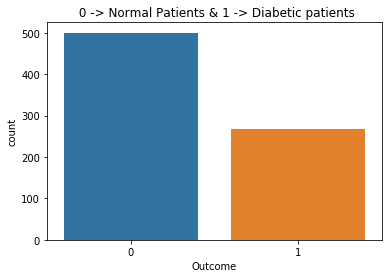

In [8]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count").set_title(' 0 -> Normal Patients & 1 -> Diabetic patients')

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


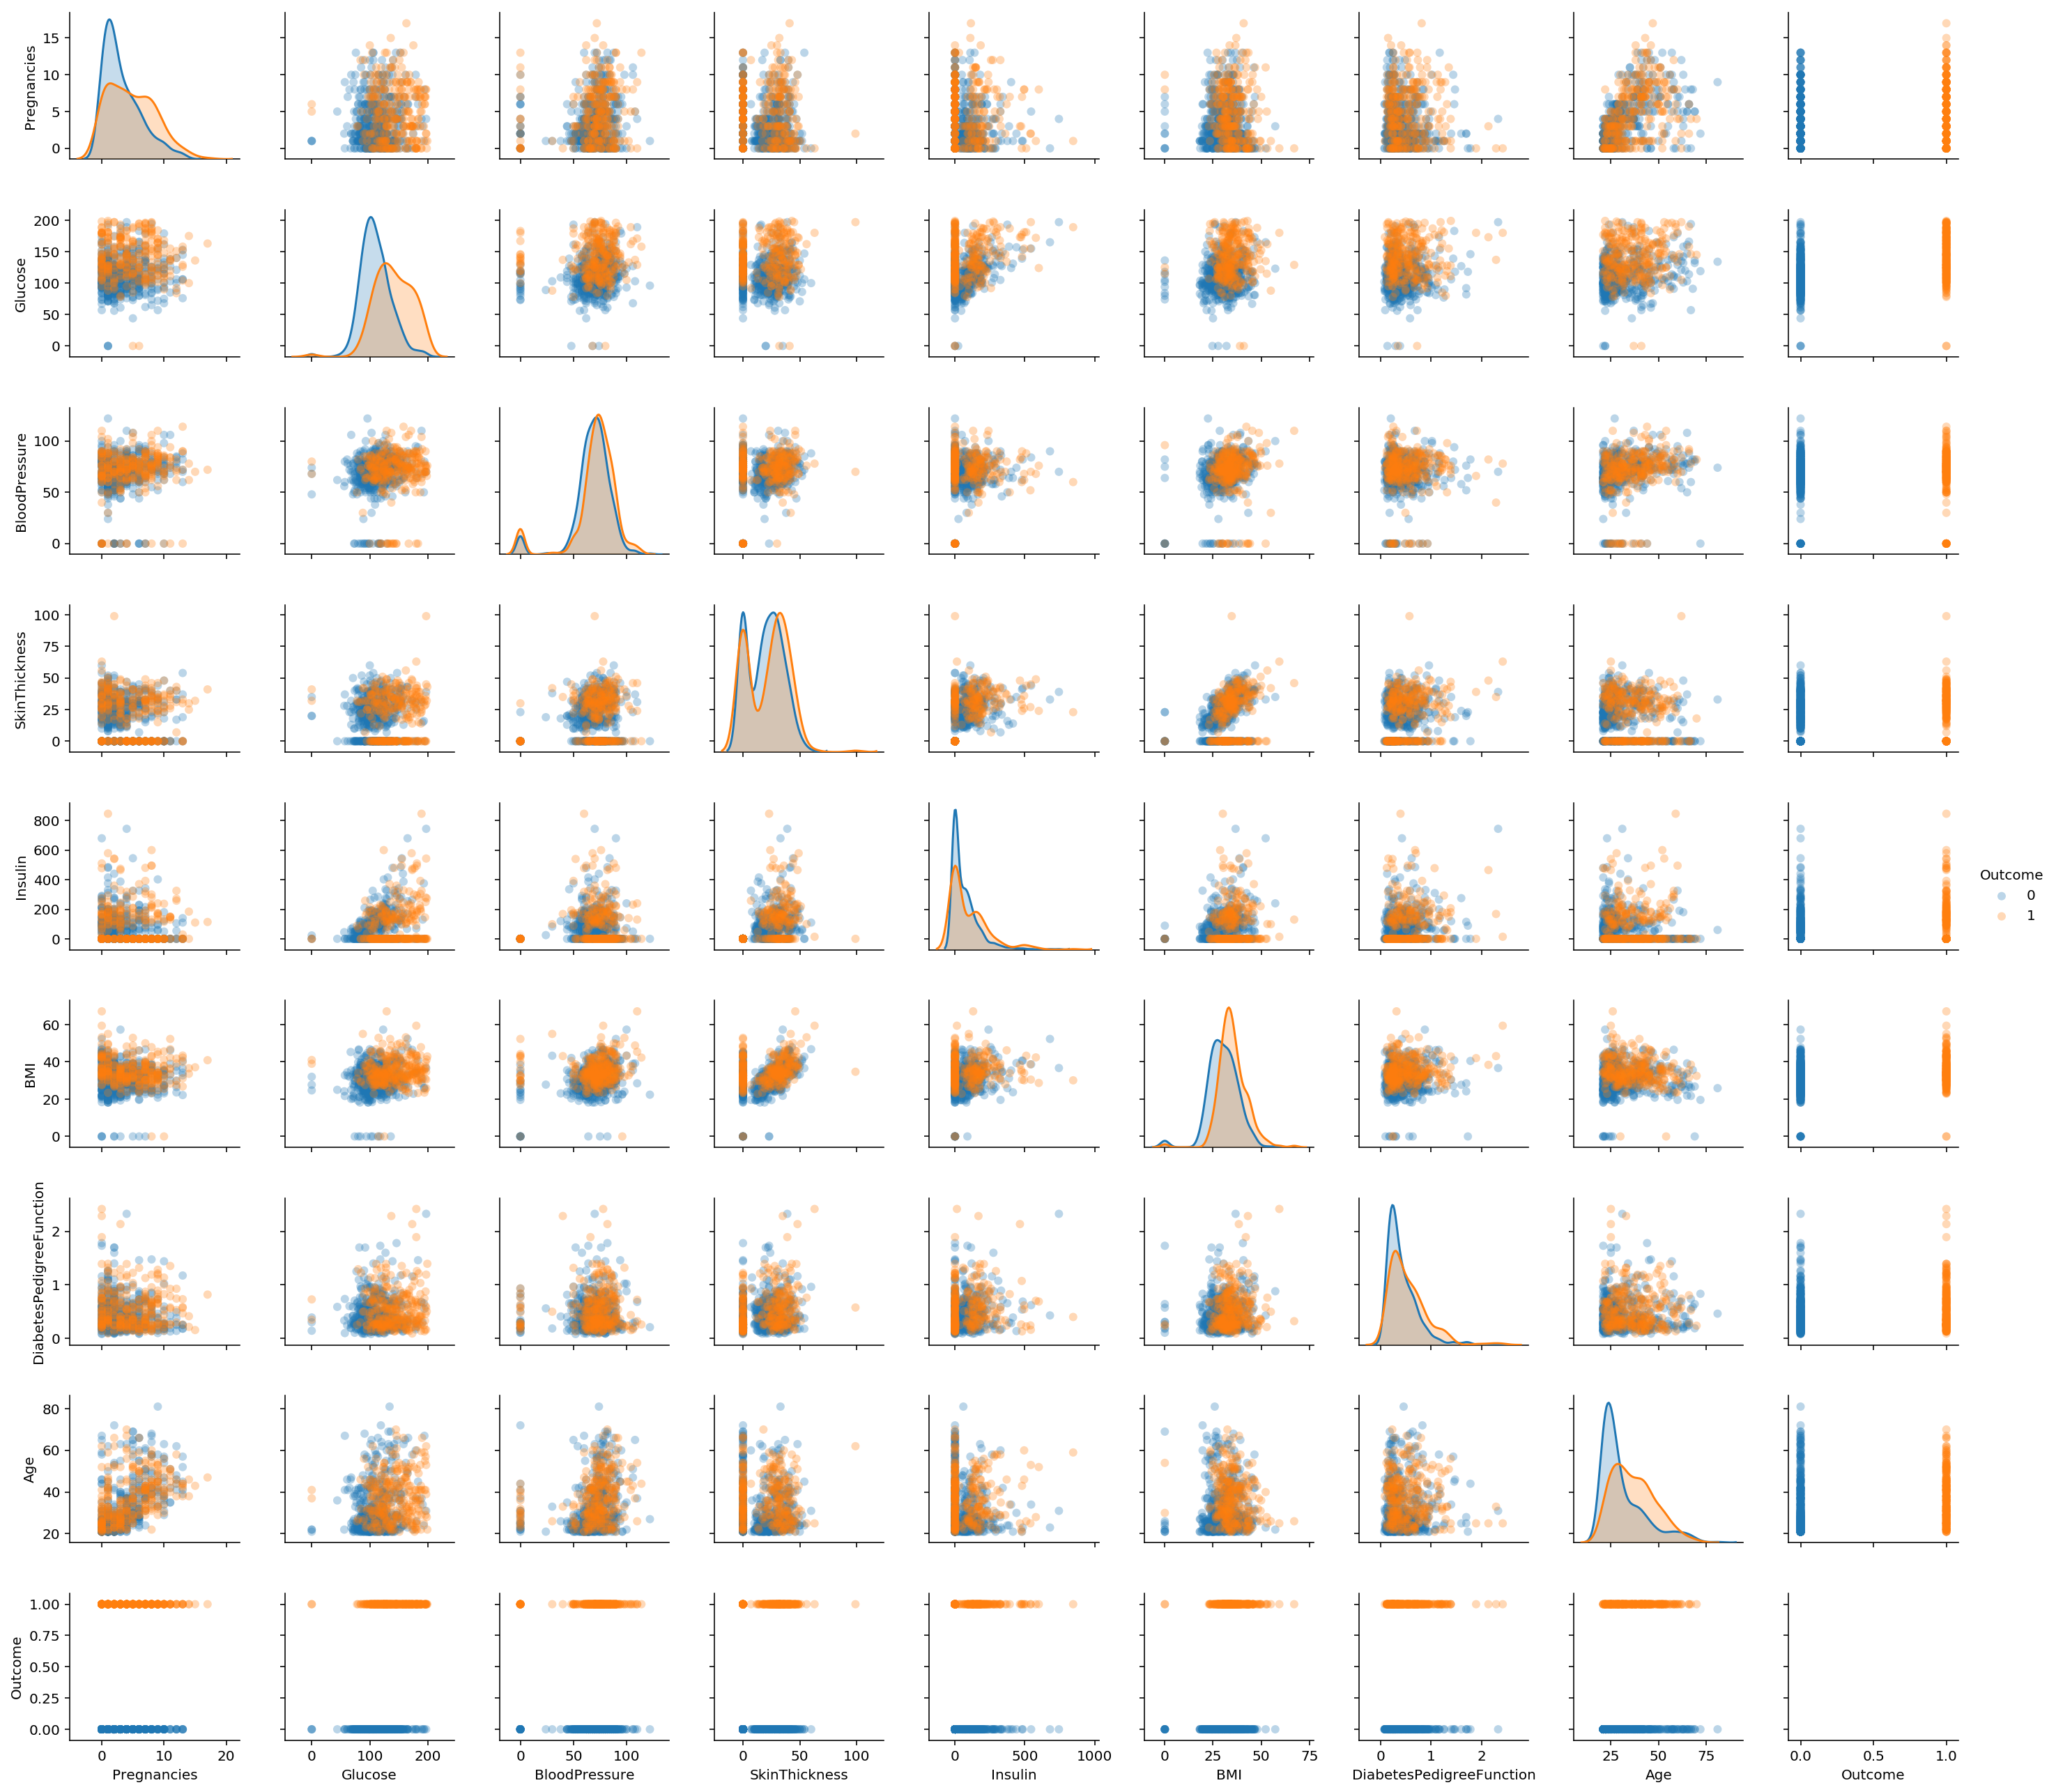

In [6]:
# visualise description of data set by a pair plot
sns.pairplot(diabetes, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

In [7]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(9.5, -0.5)

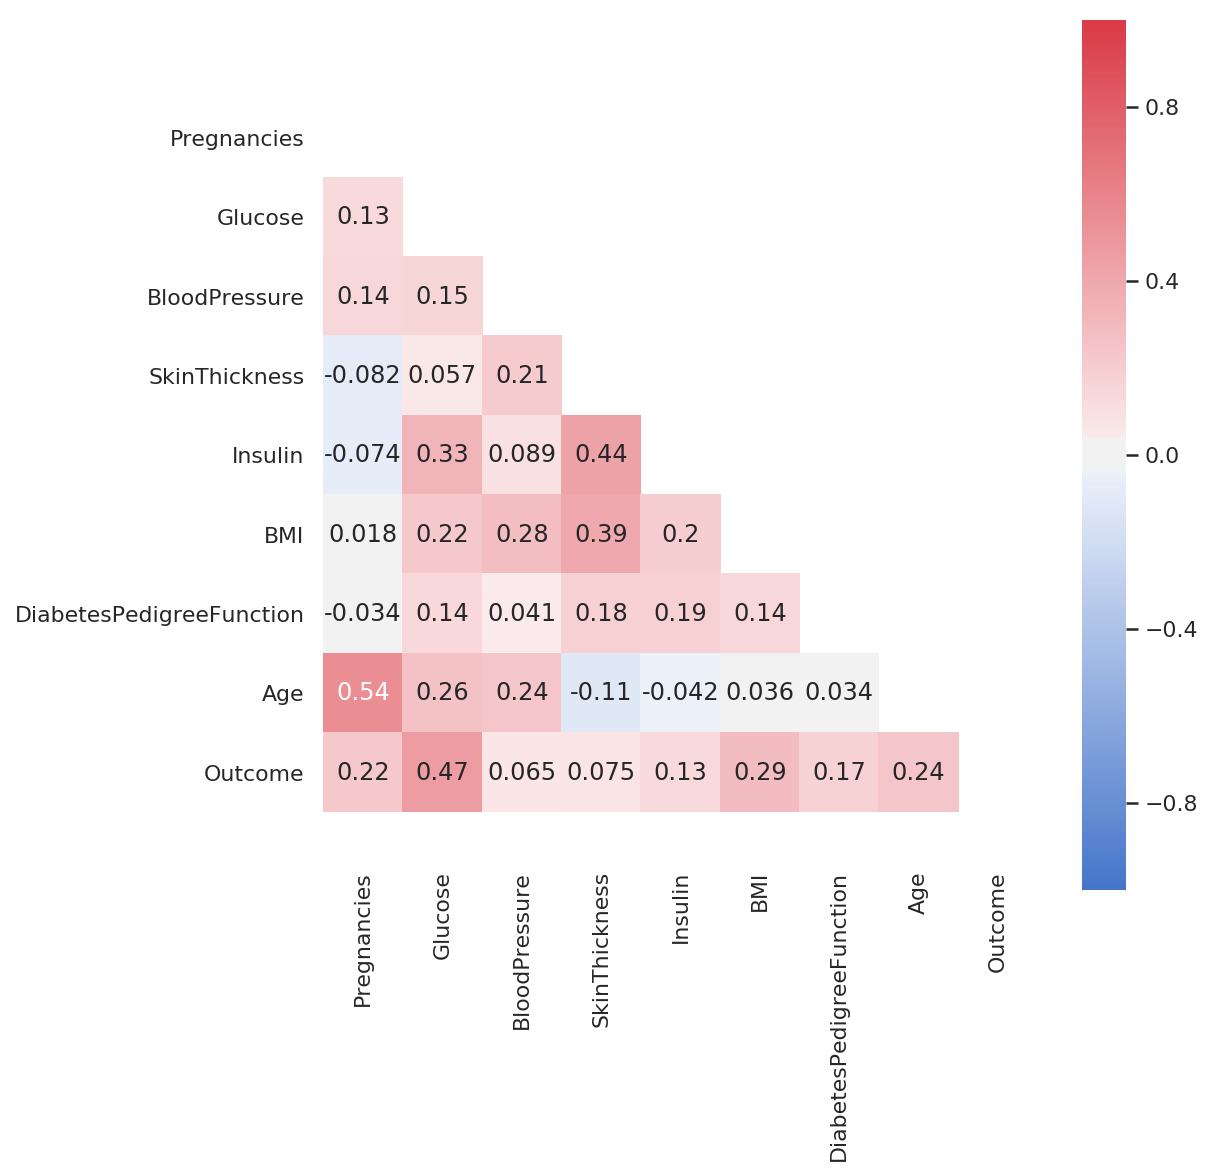

In [8]:
# Correlation Matrix Heatmap Visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(diabetes.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(diabetes.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

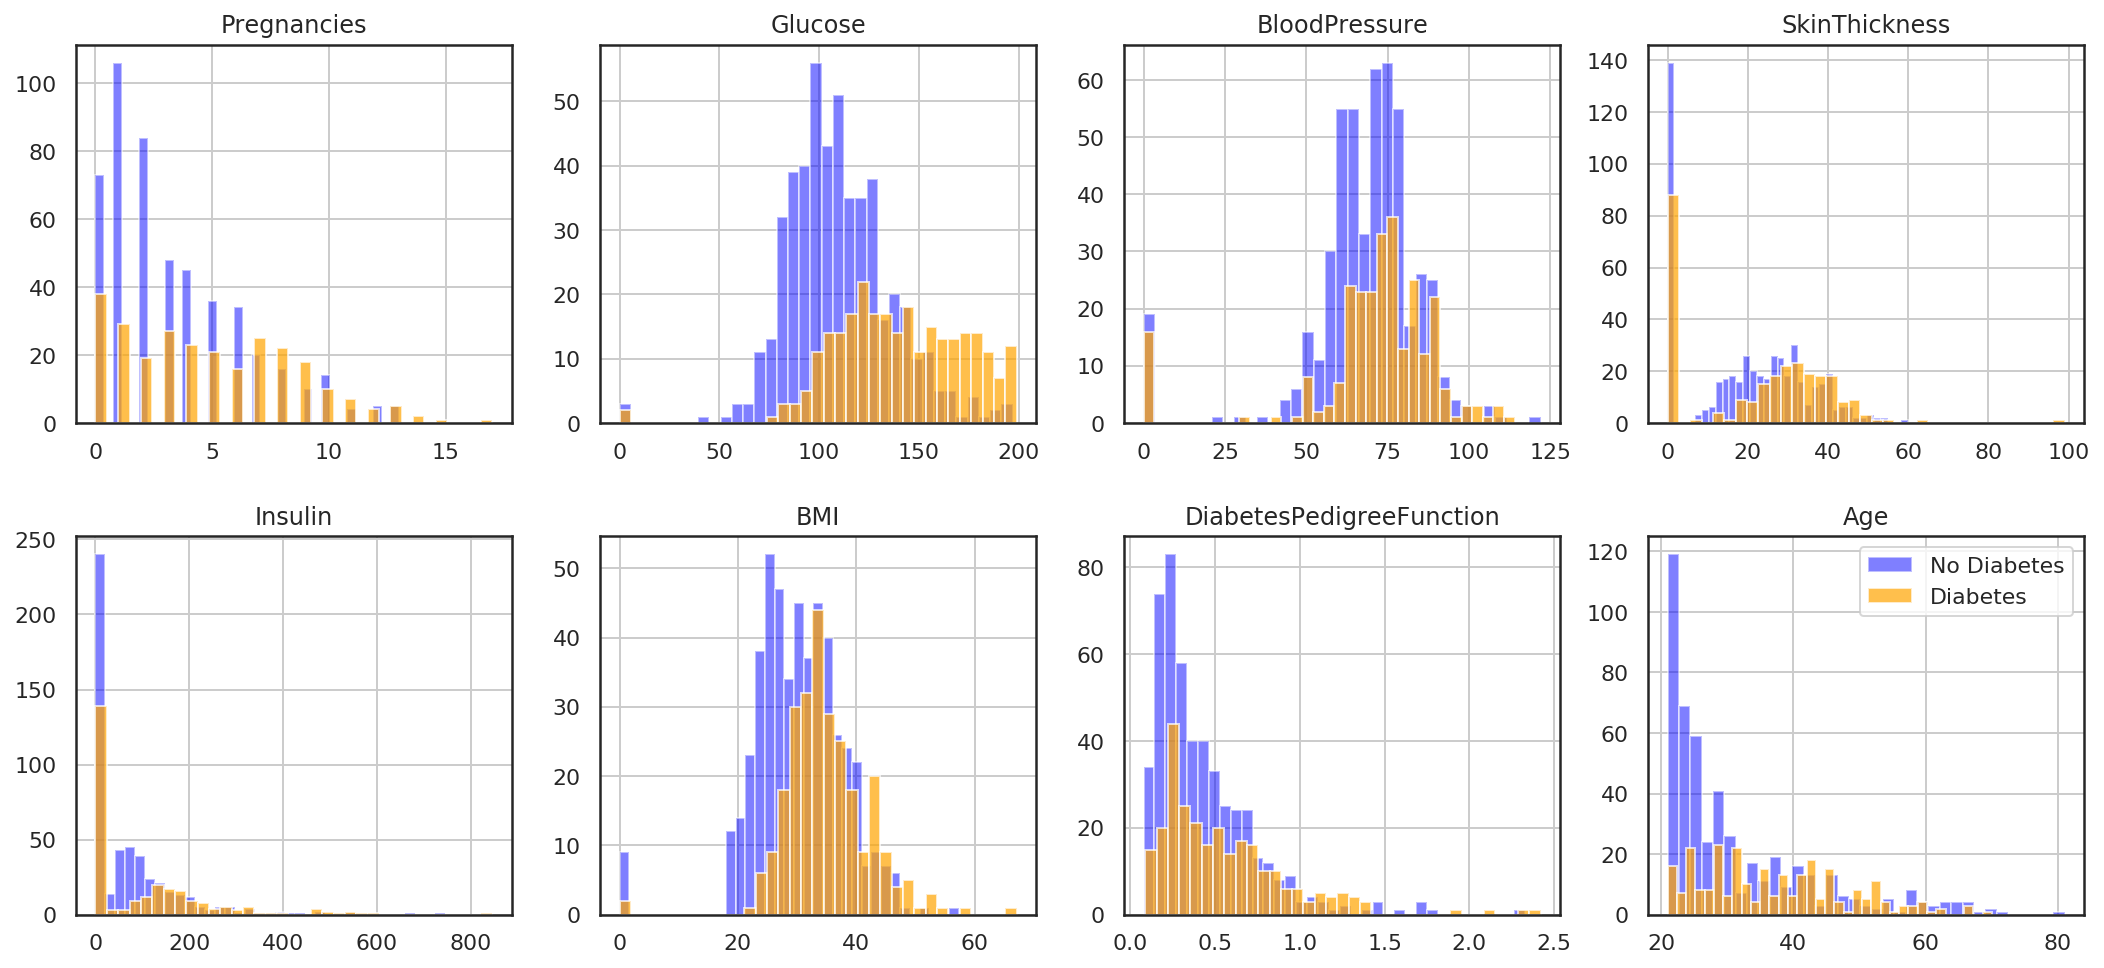

In [48]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

In [9]:
# there are zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI
# need to replace zero by median, 2 steps: replace 0 by NaN, then replace NaN by median (so that 0 will not affect median)
# after this step, run previous visualisation again

diabetes.Glucose.replace(0, np.nan, inplace=True)
diabetes.Glucose.replace(np.nan, diabetes['Glucose'].median(), inplace=True)
diabetes.BloodPressure.replace(0, np.nan, inplace=True)
diabetes.BloodPressure.replace(np.nan, diabetes['BloodPressure'].median(), inplace=True)
diabetes.SkinThickness.replace(0, np.nan, inplace=True)
diabetes.SkinThickness.replace(np.nan, diabetes['SkinThickness'].median(), inplace=True)
diabetes.Insulin.replace(0, np.nan, inplace=True)
diabetes.Insulin.replace(np.nan, diabetes['Insulin'].median(), inplace=True)
diabetes.BMI.replace(0, np.nan, inplace=True)
diabetes.BMI.replace(np.nan, diabetes['BMI'].median(), inplace=True)

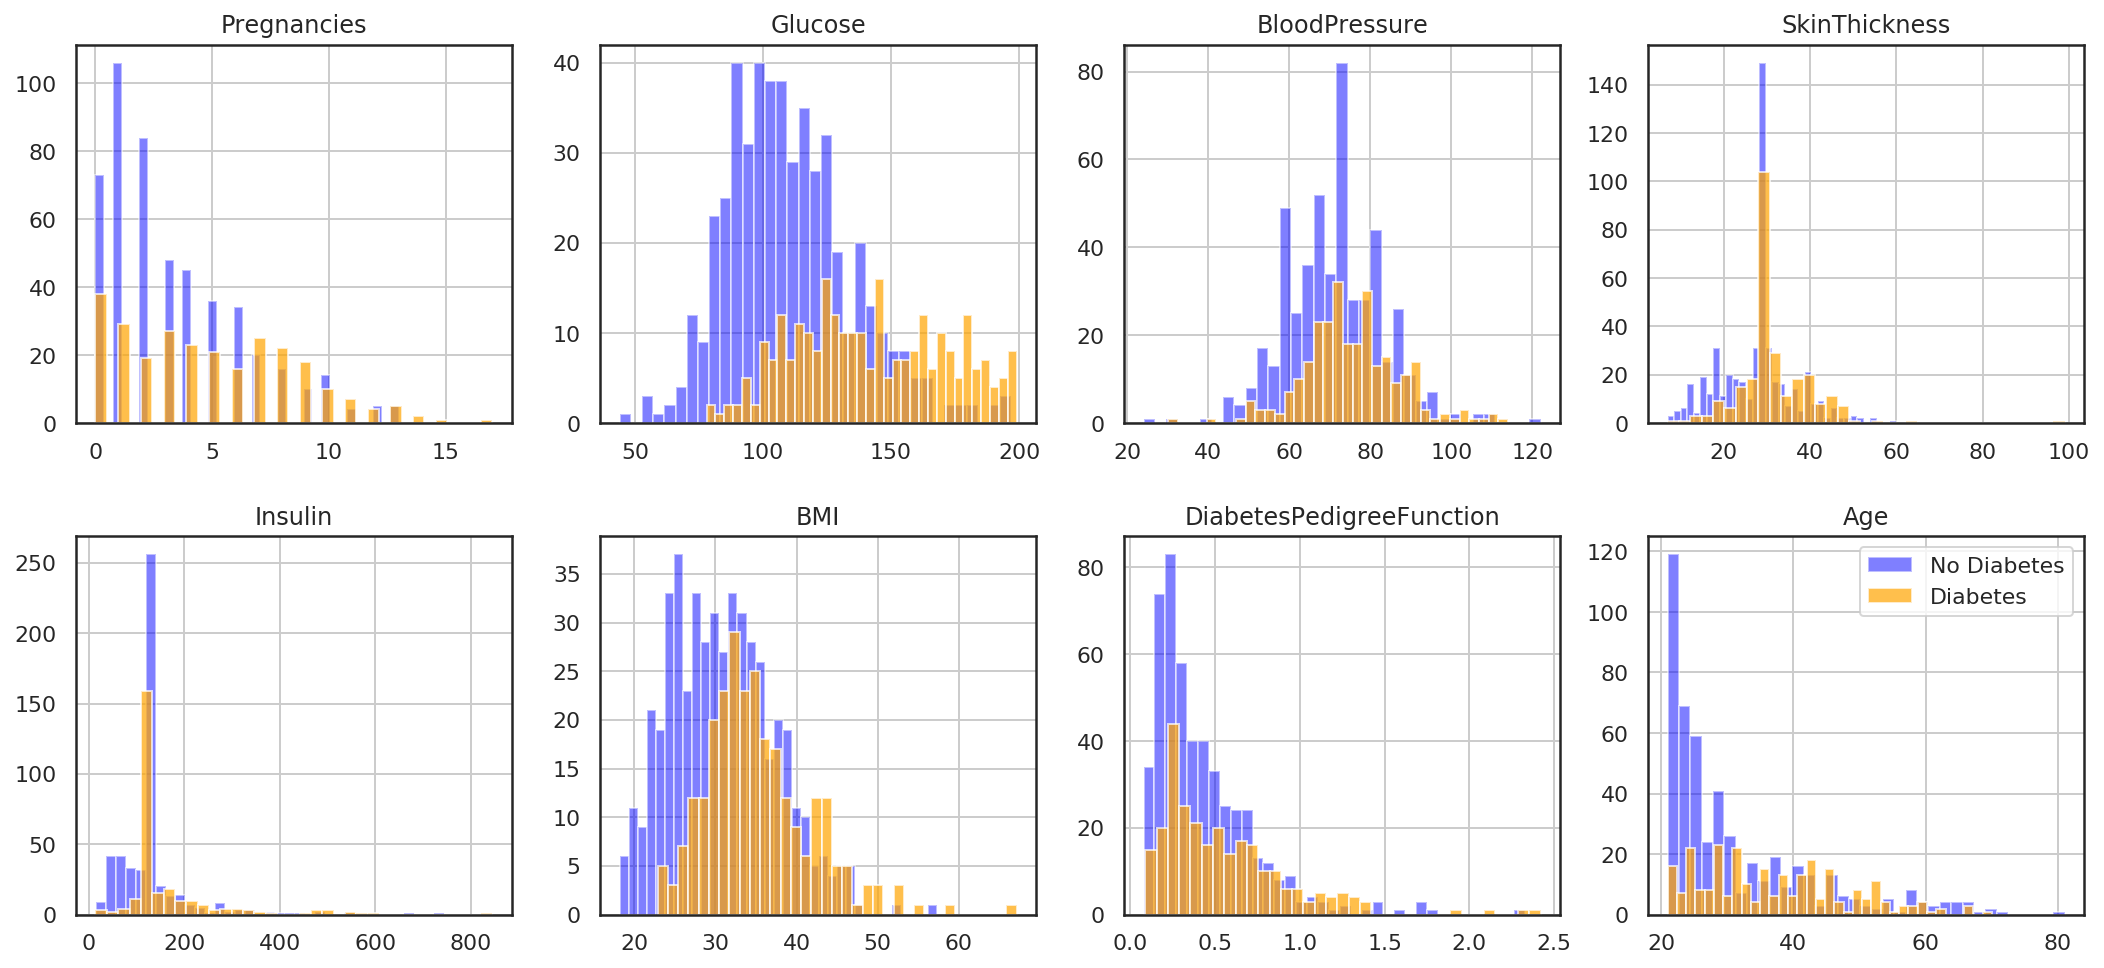

In [50]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”
First, Let’s investigate whether we can confirm the connection between model complexity and accuracy:

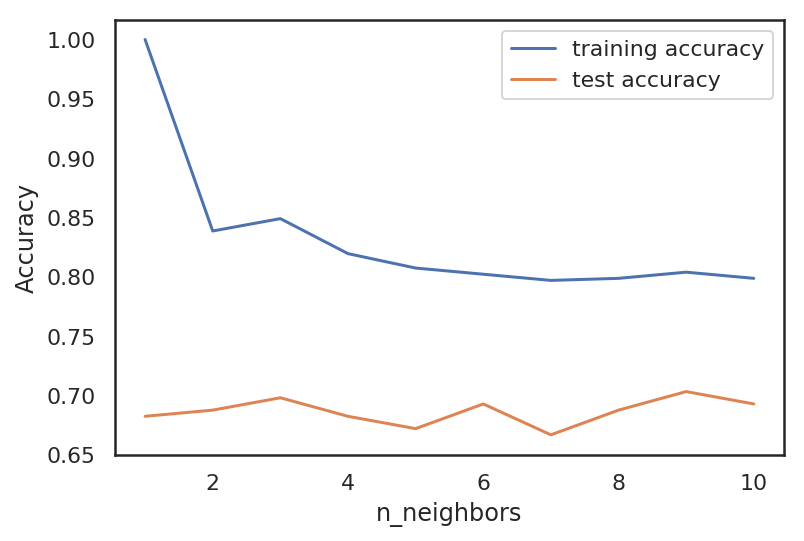

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=42)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.
The plot suggests that we should choose n_neighbors=9

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.70


In [53]:
yhat = knn.predict(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       125
           1       0.59      0.51      0.54        67

   micro avg       0.70      0.70      0.70       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.70      0.70      0.70       192



## Logistic Regression
Logistic Regression is one of the most frequently used and simple classification algorithms.

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.780
Test set score: 0.734


The default value of C=1 provides with 78% accuracy on the training and 77% accuracy on the test set.

In [13]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.698
Test set accuracy: 0.698


with C=0.01 results in lower accuracy on both the training and the test sets. so let us try for c= 100

In [14]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.786
Test set accuracy: 0.724


with C=100 results in a little bit higher accuracy on the Training set and little bit lower accuracy on the Test set, confirming that less regularization and a more complex model may not generalize better than default setting.

### Therefore, we should choose default value C=1.
Let’s visualize the coefficients learned by the models with the three different settings of the regularization parameter C.
Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C=100, C=1 and C=0.001, the coefficient is positive. This indicates that high “DiabetesPedigreeFunction” feature is related to a sample being “diabetes”, regardless which model we look at.

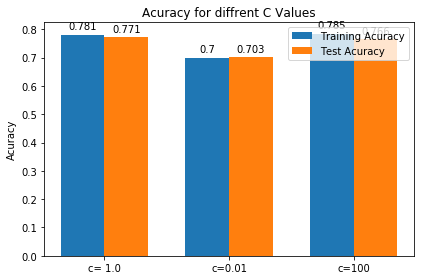

In [43]:
labels = ['c= 1.0', 'c=0.01', 'c=100']
Taining_acuracy = [0.781, 0.700, 0.785]
Test_acuracy = [0.771, 0.703, 0.766]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Taining_acuracy, width, label='Training Acuracy')
rects2 = ax.bar(x + width/2, Test_acuracy, width, label='Test Acuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acuracy')
ax.set_title('Acuracy for diffrent C Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [85]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       125
           1       0.62      0.37      0.47        67

   micro avg       0.70      0.70      0.70       192
   macro avg       0.67      0.63      0.63       192
weighted avg       0.69      0.70      0.68       192



In [58]:
yhat = logreg.predict(X_test)        # fordefault c=1
yhat_prob = logreg.predict_proba(X_test)

yhat001 = logreg001.predict(X_test)       # when c =0.01
yhat001_prob = logreg001.predict_proba(X_test)

yhat100 = logreg100.predict(X_test)       # when c= 100
yhat100_prob = logreg100.predict_proba(X_test)

In [59]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4983474308958651

In [60]:
log_loss(y_test, yhat001_prob)

0.5778459845748722

In [61]:
log_loss(y_test, yhat100_prob)

0.4989005304357927

by observing logloss for three diffrent values of C, best is clearly logistic regression with c=.001

## Decision Tree
Let us try the classification using decision tree method

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [28]:
tree_max_depth = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_max_depth.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


In [17]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

#### Feature Importance in Decision Trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”. The feature importances always sum to 1:

In [29]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.08382659 0.36314707 0.05114301 0.05735695 0.08910801 0.1400336
 0.10487312 0.11051166]


for a better understanding , we can visulase as follows

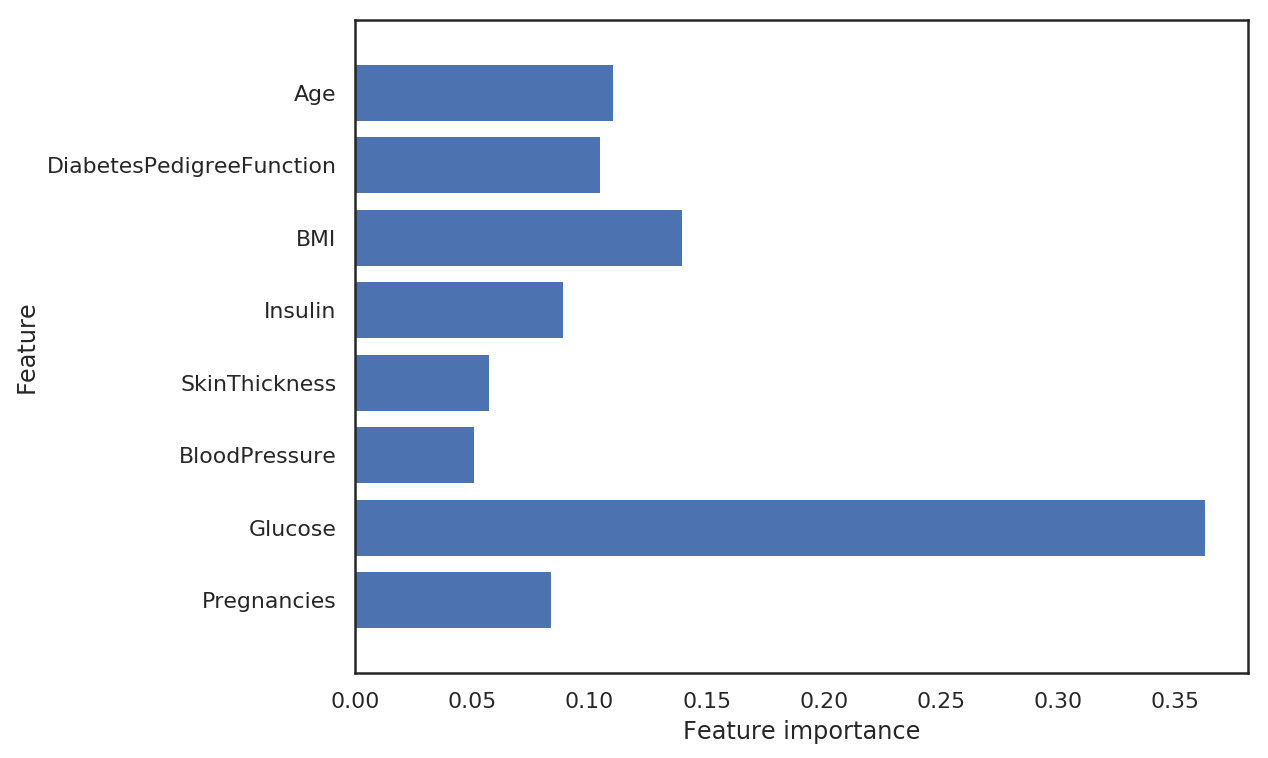

In [30]:
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

from the above graph we can easily say Feature Glucose has a great impact on diabtese

In [90]:
yhat = tree.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.66      0.49      0.56        67

   micro avg       0.73      0.73      0.73       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



In [67]:
yhat_prob = tree.predict_proba(X_test)
log_loss(y_test, yhat_prob)

10.25369924223911

## Random Forest classification
Let’s apply a random forest consisting of 100 trees on the diabetes data set:

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.734


#### Random forest classification gave us better accuracy than Logestic Regression and single decision tree without tuning any parameters
Let us examine results by adjusting max_features setting

In [69]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.729


so there is no improvement in the accuracy, default setting gave better accuracy

#### Feature importance in Random Forest

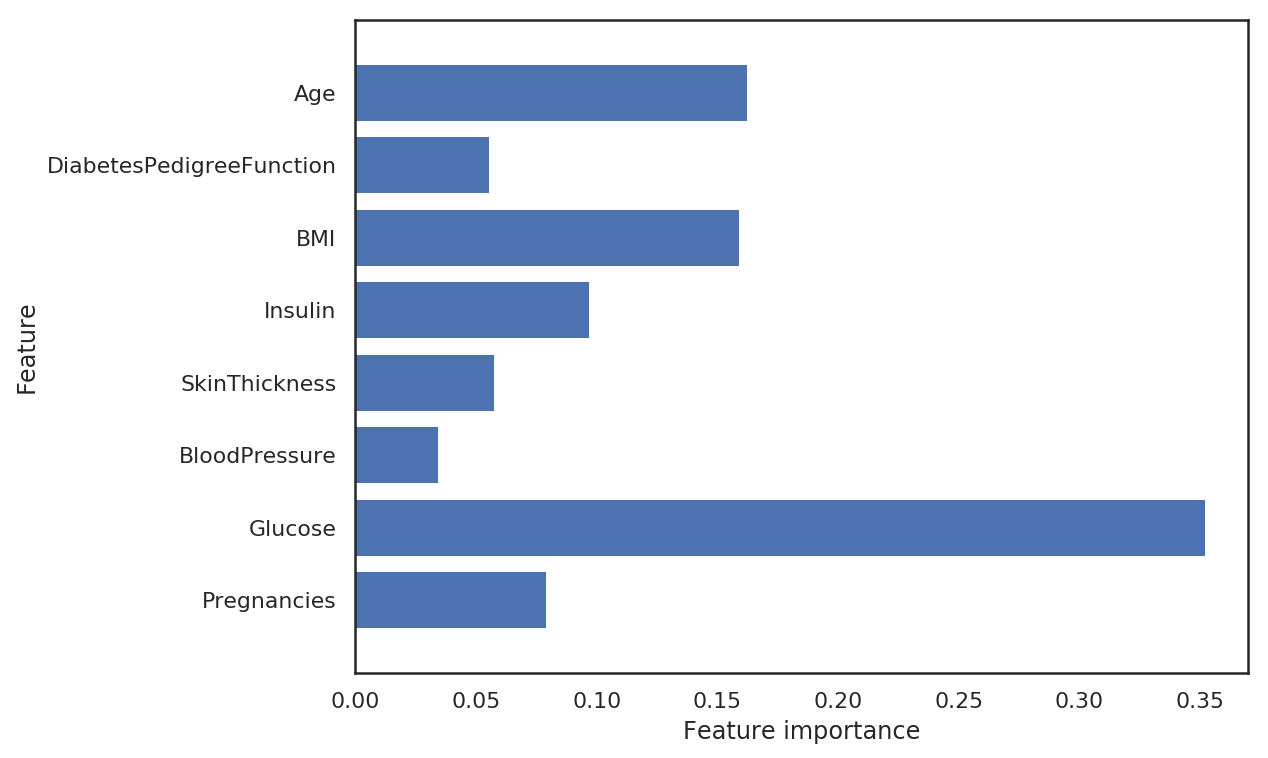

In [70]:
plot_feature_importances_diabetes(rf1)

Similarly to the single decision tree, the random forest also gave a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations.
So the result being that the <b>random forest captures a much broader picture of the data than a single tree<b>.

## Gradient Boosting tree

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.932
Accuracy on test set: 0.734


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [72]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.734


In [73]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.719


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. However, in this case, none of these methods increased the generalization performance of the test set.

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model:

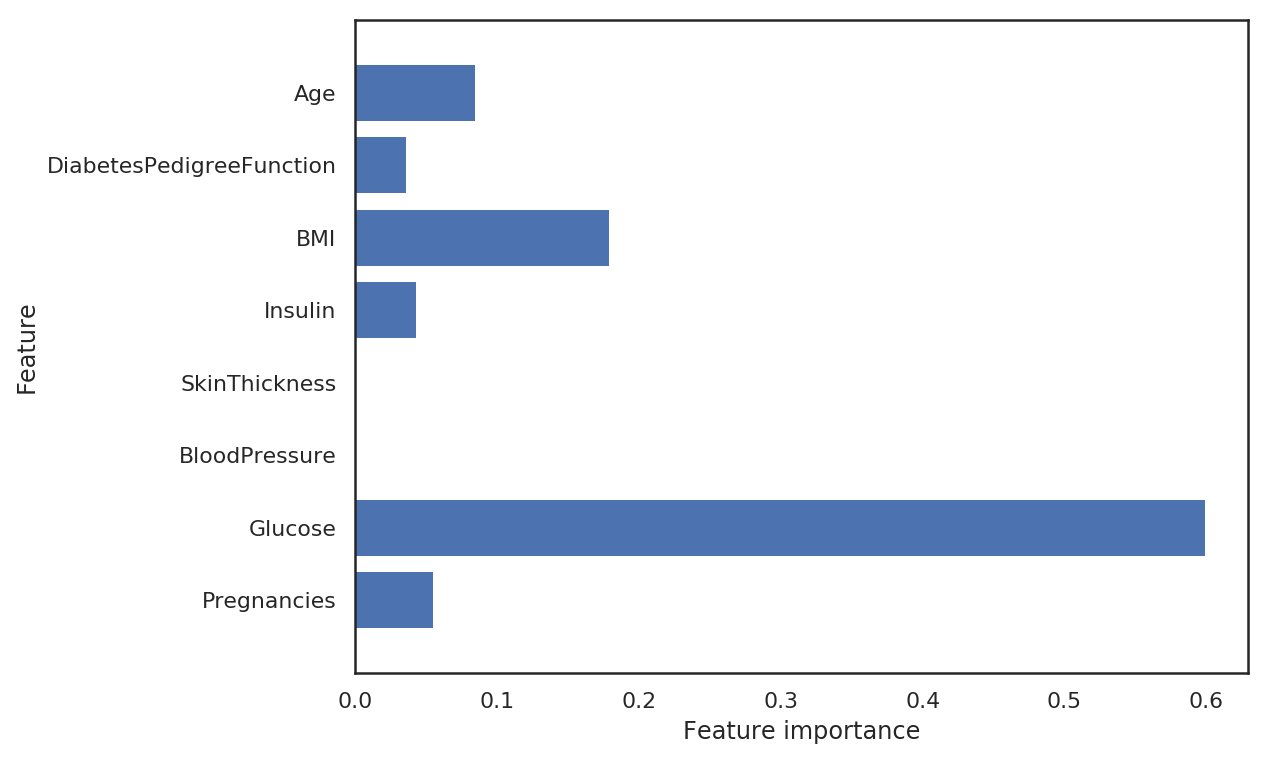

In [74]:
plot_feature_importances_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

## Support Vector Machine

In [15]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale:

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.73


Scaling the data made a huge difference. Now <b> we are actually underfitting, <b> where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [17]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.812
Accuracy on test set: 0.734


Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.

### Deep Learning

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.75
Accuracy on test set: 0.69


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must re-scale our data so that it fulfills these requirements.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.828
Accuracy on test set: 0.724


Let’s increase the number of iterations:

In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.740


Increasing the number of iterations only increased the training set performance, not the test set performance.

Let’s increase the alpha parameter and add stronger regularization of the weights:

In [22]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.825
Accuracy on test set: 0.724


The result is good, but we are not able to increase the test accuracy further.
Therefore, our best model so far is default deep learning model after scaling.

Finally, we plot a heat map of the first layer weights in a neural network learned on the diabetes dataset.

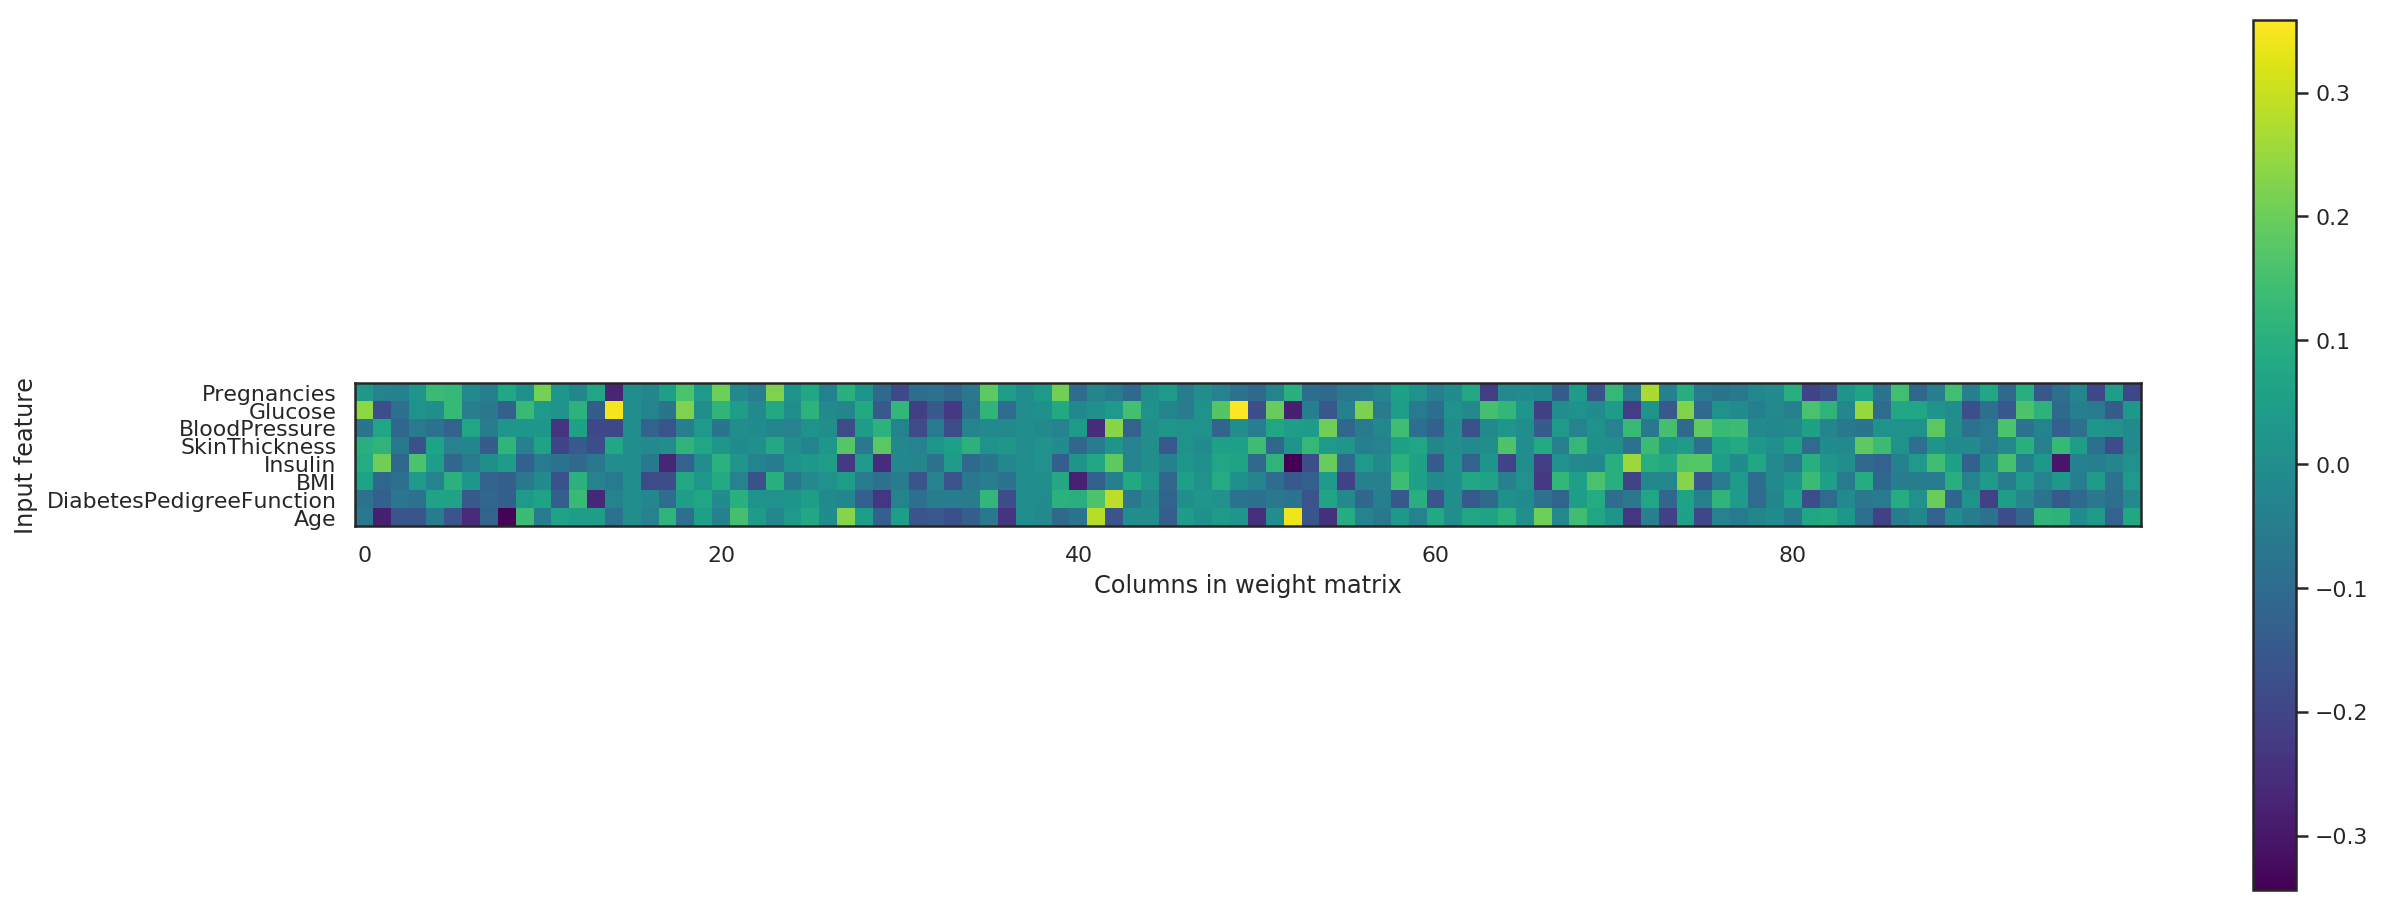

In [31]:

plt.figure(figsize=(20,8))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")

plt.colorbar()

### Cross validation
Cross validation of all the above models can be performed using Scikit-learn StratifiedKFold

In [32]:
X = diabetes.drop('Outcome', axis=1)   # axis=0 for row, axis=1 for column
y = diabetes['Outcome']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
## Baseline model performance evaluation
# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [0]       })   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models
gnb = GaussianNB()
mlp = MLPClassifier()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svc = SVC()


# to concat all models
df_models = pd.concat([baseline_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(mlp, X_train, X_test, y_train, y_test, 'DeepLearningMLP'),
                       baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       baseline_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.757257,0.671205,0.592470,0.624538,0.824943,10.316912,0
1,DeepLearningMLP,0.693762,0.548362,0.373090,0.500218,0.710875,9.195539,0
2,LogisticRegression,0.758856,0.694358,0.536323,0.600393,0.821686,9.868305,0
3,KNN,0.723044,0.607567,0.578627,0.589537,0.758864,11.214008,0
4,DecisionTree,0.703545,0.542561,0.564673,0.579366,0.658880,10.316876,0
5,RandomForest,0.768693,0.704132,0.508638,0.562494,0.778645,10.092593,0
6,SVC,0.651473,0.000000,0.000000,0.000000,0.671100,12.111000,0


Based on the obesevation from the above table we have to give importance to the recall metric bacause we should not classify diabetic as non diabetic, so <b>GaussianNB classifier has a very good Recall Score,good F1 score and moderate logloss<b>.

### Optimisation - parameter tuning
Based on the obesevation from the above table we have to give importance to the recall metric bacause we should not classify diabetic as non diabetic, so GNB has a very good Recall Score,good F1 score and moderate logloss.
Now we have to optimise the model by tuning parameters

In [34]:

def model_report(model, X_train, X_test, y_train, y_test, model_name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(model_name, 'Log-loss: {:.4f}'.format(logloss))

    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [1000]       })   # timetaken for comparison later
    return df_model

In [35]:
gnb = GaussianNB()
model1 = model_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')


Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5192,  0.100->0.6259,  0.200->0.6260,  0.300->0.5882,  0.400->0.5812,  0.500->0.5965,  0.600->0.5926,  0.700->0.5686,  0.800->0.5000,  0.900->0.4524,  1.000->0.1333,  
Looping decimal place 2
0.100->0.6259,  0.110->0.5972,  0.120->0.6014,  0.130->0.6056,  0.140->0.6143,  0.150->0.6143,  0.160->0.6087,  0.170->0.6269,  0.180->0.6316,  0.190->0.6260,  0.200->0.6260,  0.210->0.6308,  0.220->0.6357,  0.230->0.6349,  0.240->0.6240,  0.250->0.6240,  0.260->0.6129,  0.270->0.6066,  0.280->0.5833,  0.290->0.5833,  0.300->0.5882,  
Looping decimal place 3
0.210->0.6308,  0.211->0.6308,  0.212->0.6308,  0.213->0.6308,  0.214->0.6308,  0.215->0.6308,  0.216->0.6308,  0.217->0.6308,  0.218->0.6308,  0.219->0.6308,  0.220->0.6357,  0.221->0.6357,  0.222->0.6357,  0.223->0.6299,  0.224->0.6299,  0.225->0.6349,  0.226->0.6349,  0.227->0.6349,  0.228->0.6349,  0.229->0.6349,  0.2

In [36]:
decisiontree = DecisionTreeClassifier()
model2 = model_report(decisiontree, X_train, X_test, y_train, y_test, 'Decision Tree')


Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5294,  0.100->0.5294,  0.200->0.5294,  0.300->0.5294,  0.400->0.5294,  0.500->0.5294,  0.600->0.5294,  0.700->0.5294,  0.800->0.5294,  0.900->0.5294,  1.000->0.5294,  
Looping decimal place 2
0.000->0.5294,  0.010->0.5294,  0.020->0.5294,  0.030->0.5294,  0.040->0.5294,  0.050->0.5294,  0.060->0.5294,  0.070->0.5294,  0.080->0.5294,  0.090->0.5294,  0.100->0.5294,  
Looping decimal place 3
0.000->0.5294,  0.001->0.5294,  0.002->0.5294,  0.003->0.5294,  0.004->0.5294,  0.005->0.5294,  0.006->0.5294,  0.007->0.5294,  0.008->0.5294,  0.009->0.5294,  0.010->0.5294,  optimal F1 score = 0.5294
optimal threshold = 0.000
Decision Tree accuracy score is
Training: 100.00%
Test set: 68.83%

Adjust threshold to 0.25:
Precision: 0.5625,   Recall: 0.5000,   F1 Score: 0.5294
Decision Tree confusion matrix: 
 [[79 21]
 [27 27]]

Default threshold of 0.50:
Precision: 0.5625,   Rec

In [40]:
knn = KNeighborsClassifier()
model3 = model_report(knn, X_train, X_test, y_train, y_test, 'KNearest Neighbour')


Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5802,  0.100->0.5802,  0.200->0.5581,  0.300->0.5581,  0.400->0.5192,  0.500->0.5192,  0.600->0.5192,  0.700->0.4524,  0.800->0.4524,  0.900->0.2462,  1.000->0.2462,  
Looping decimal place 2
0.000->0.5802,  0.010->0.5802,  0.020->0.5802,  0.030->0.5802,  0.040->0.5802,  0.050->0.5802,  0.060->0.5802,  0.070->0.5802,  0.080->0.5802,  0.090->0.5802,  0.100->0.5802,  
Looping decimal place 3
0.000->0.5802,  0.001->0.5802,  0.002->0.5802,  0.003->0.5802,  0.004->0.5802,  0.005->0.5802,  0.006->0.5802,  0.007->0.5802,  0.008->0.5802,  0.009->0.5802,  0.010->0.5802,  optimal F1 score = 0.5802
optimal threshold = 0.000
KNearest Neighbour accuracy score is
Training: 80.13%
Test set: 67.53%

Adjust threshold to 0.25:
Precision: 0.4800,   Recall: 0.6667,   F1 Score: 0.5581
KNearest Neighbour confusion matrix: 
 [[61 39]
 [18 36]]

Default threshold of 0.50:
Precision: 0.54

### Confusion Matrix for GaussianNB classifier
After parameter tuning for top 3 performing models, GaussianNB has the Recall score of 74% F score of 65% accuracy of 77.28% and lowest logloss of 0.788 

In [95]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no diabetes', 'diabetes'],
           yticklabels=['no diabetes', 'diabetes']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

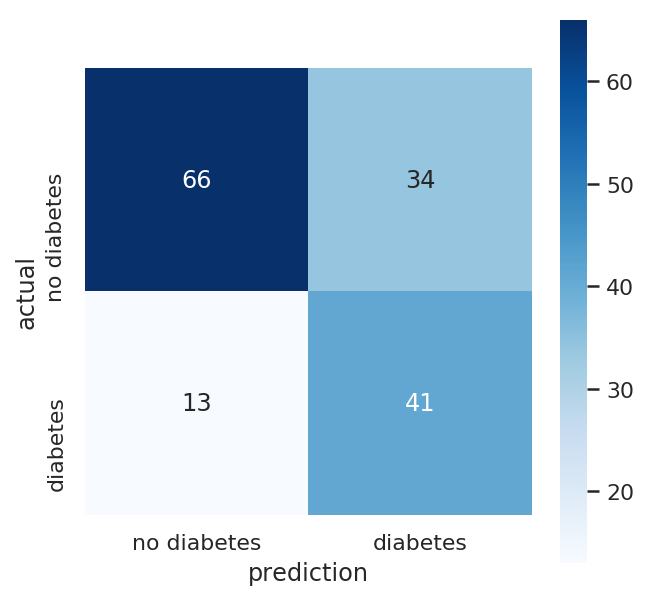

In [96]:
gnb = GaussianNB()
threshold =0.220
make_confusion_matrix(gnb, threshold)

From the above Confusion matrix we can summarise as follows:
1. 

Predicting diabetes as diabetes is 76% (Recall metric) and no diabetes as no diabetes of 84%, still scope for improvementis there.